In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = pd.read_csv('train.csv')
data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].head()


,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [5]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 2806426667.247852
R² Score: 0.6341189942328374


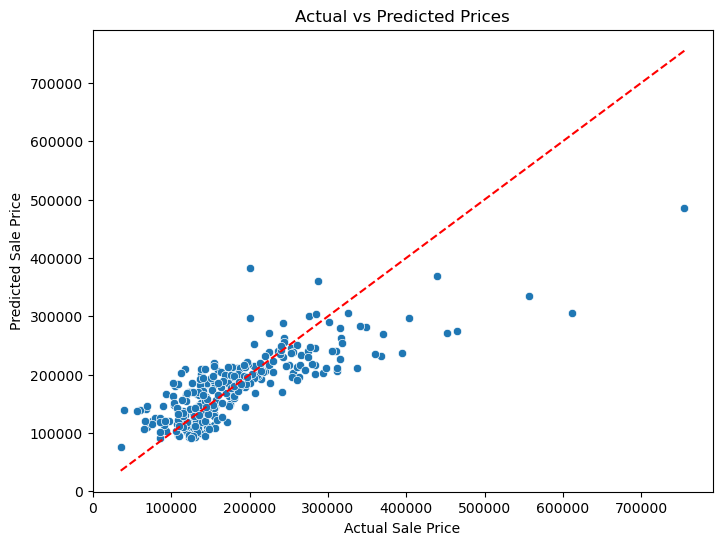

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


In [10]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


               Coefficient
GrLivArea       104.026307
BedroomAbvGr -26655.165357
FullBath      30014.324109


In [12]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'GarageCars', 'YearBuilt']]


In [13]:
X.isnull().sum()


GrLivArea       0
BedroomAbvGr    0
FullBath        0
GarageCars      0
YearBuilt       0
dtype: int64

In [14]:
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
pred_df.to_csv('house_predictions.csv', index=False)


🏠 House Price Prediction using Linear Regression
Objective:
Predict house sale prices based on GrLivArea, BedroomAbvGr, and FullBath.

Steps:

Loaded train.csv dataset

Selected 3 features for prediction

Split data into train/test sets

Built a Linear Regression model using scikit-learn

Evaluated model using:

Mean Squared Error

R² Score

Scatter plot of actual vs predicted

Exported predictions to house_predictions.csv

Result:
Model captures the trend but shows some variance at high values — further feature engineering or model tuning (e.g. using Random Forest) could improve accuracy.

